In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
! pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 640.0 kB/s eta 0:03:55
   ---------------------------------------- 0.2/150.0 MB 2.5 MB/s eta 0:01:01
   ---------------------------------------- 0.5/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 0.9/150.0 MB 5.5 MB/s eta 0:00:27
   ---------------------------------------- 1.3/150.0 MB 6.5 MB/s eta 0:00:24
   ---------------------------------------- 1.9/150.0 MB 7.4 MB/s eta 0:00:21
    --------------------------------------- 2.4/150.0 MB 8.0 MB/s eta 0:00:19
    --------------------------------------- 2.9/150.0 MB 8.5 MB/s eta 0:00:18
    --------------------------------------- 3.5/150.0 MB 8.8 MB/s eta 0:00:17
   - -------------------------------------- 4.0/150.0 MB 9.1 MB/s eta 0:00:17
   - -------------------------------------- 4.5/150.0 MB 9.4 MB/s eta 0:00:16
   - -------------------------------------- 5.1/150.0 MB 9.6 MB/s eta

In [11]:
import xgboost as xgb

In [21]:
data = pd.read_csv('AEP_hourly.csv')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [25]:
data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [29]:
data.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [31]:
data.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [41]:
dataset = data.copy()  # avoid modifying the original DataFrame
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])

# Extract time-based features
dataset['Month'] = dataset['Datetime'].dt.month
dataset['Year'] = dataset['Datetime'].dt.year
dataset['Date'] = dataset['Datetime'].dt.date
dataset['Time'] = dataset['Datetime'].dt.time
dataset['Day'] = dataset['Datetime'].dt.day
dataset['Week'] = dataset['Datetime'].dt.isocalendar().week

# Set the index
dataset = dataset.set_index('Datetime')

dataset.head()






,AEP_MW,Month,Year,Date,Time,Day,Week
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,31,53
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,31,53
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,31,53
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,31,53
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,31,53


In [43]:
print(data.Year.unique(), '\n')
print('Total Number of Unique Year', data.Year.nunique(), '\n')

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



C:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


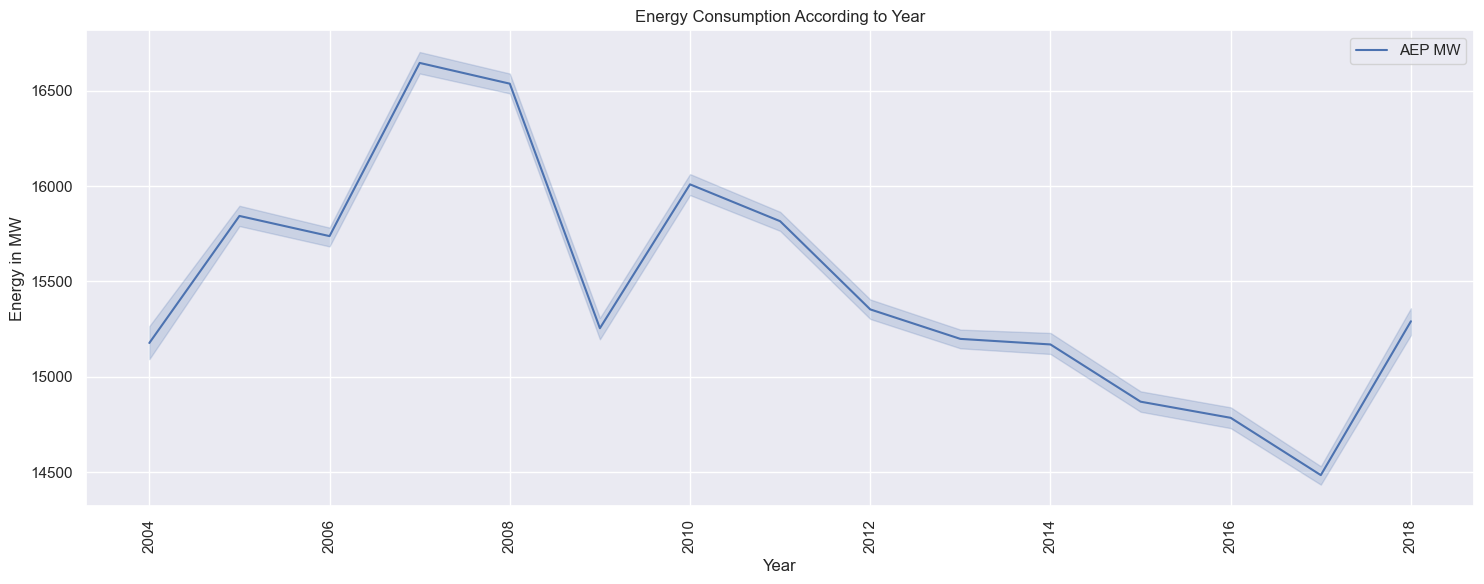

In [47]:
from matplotlib import style
style.use('ggplot')
sns.set(rc={'figure.figsize': (15, 6)})

# Create figure and axis
fig = plt.figure()
ax1 = plt.subplot2grid((1, 1), (0, 0))

# Plot on ax1 using seaborn
sns.lineplot(x=dataset.index.year, y=dataset['AEP_MW'], ax=ax1, label='AEP MW')

# Customize plot
ax1.set_title('Energy Consumption According to Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy in MW')
ax1.grid(True)
ax1.legend()

# Rotate x-axis labels
for label in ax1.get_xticklabels():
    label.set_rotation(90)

plt.tight_layout()
plt.show()

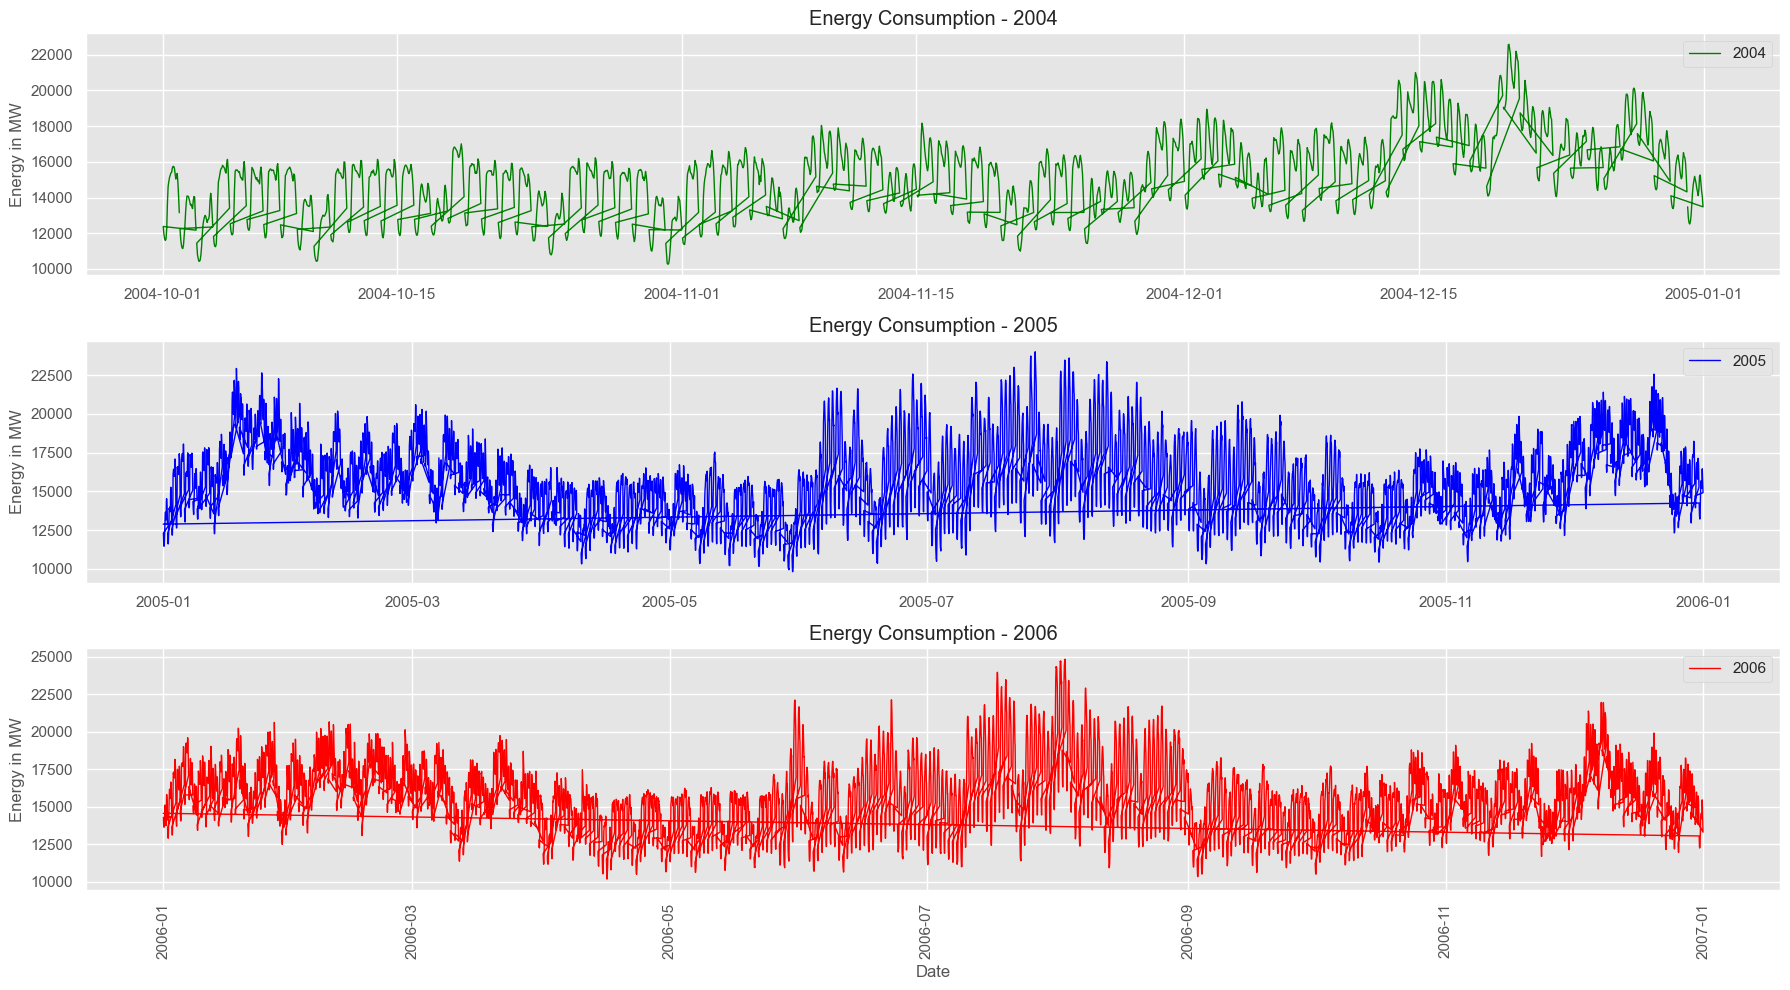

In [57]:
# Apply style first
style.use('ggplot')

# Set figure size during creation
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Ensure index is datetime
dataset.index = pd.to_datetime(dataset.index)

# Filter by year using .loc with string slicing
data_2004 = dataset.loc['2004']
data_2005 = dataset.loc['2005']
data_2006 = dataset.loc['2006']

# Plot 2004
ax1.plot(data_2004.index, data_2004['AEP_MW'], color='green', linewidth=1, label='2004')
ax1.set_title('Energy Consumption - 2004')
ax1.set_ylabel('Energy in MW')
ax1.legend()
ax1.grid(True)

# Plot 2005
ax2.plot(data_2005.index, data_2005['AEP_MW'], color='blue', linewidth=1, label='2005')
ax2.set_title('Energy Consumption - 2005')
ax2.set_ylabel('Energy in MW')
ax2.legend()
ax2.grid(True)

# Plot 2006
ax3.plot(data_2006.index, data_2006['AEP_MW'], color='red', linewidth=1, label='2006')
ax3.set_title('Energy Consumption - 2006')
ax3.set_xlabel('Date')
ax3.set_ylabel('Energy in MW')
ax3.legend()
ax3.grid(True)

# Rotate x-axis labels
for label in ax3.get_xticklabels():
    label.set_rotation(90)

plt.tight_layout()
plt.show()


C:\Users\sharm\AppData\Local\Temp\ipykernel_11184\273907813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['AEP_MW'])
C:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Energy Distribution')

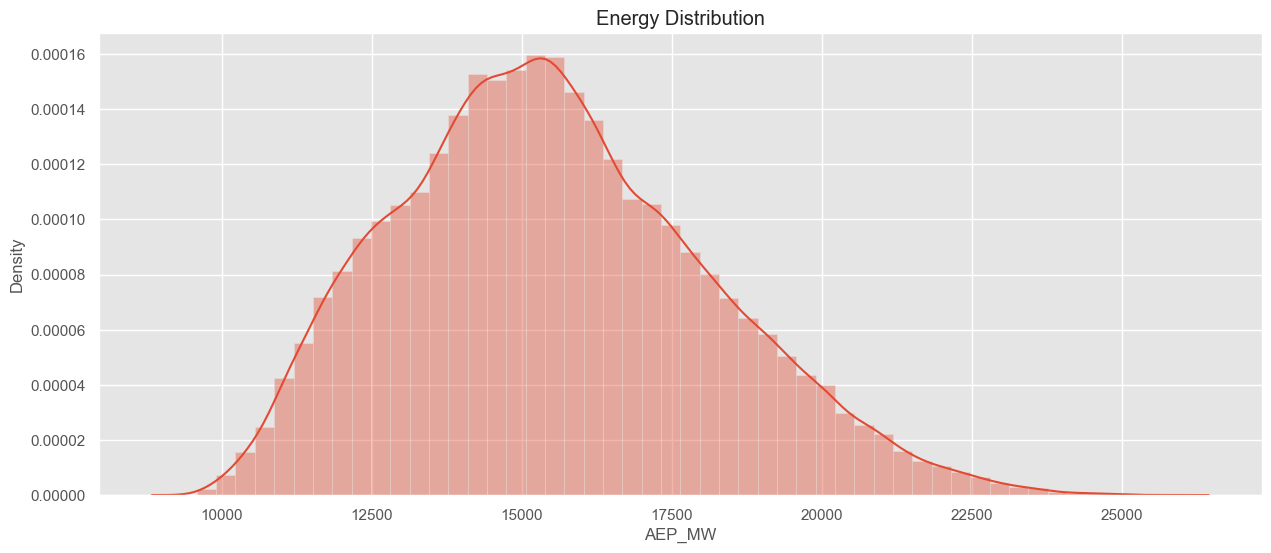

In [59]:
sns.distplot(dataset['AEP_MW'])
plt.title('Energy Distribution')

C:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sharm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


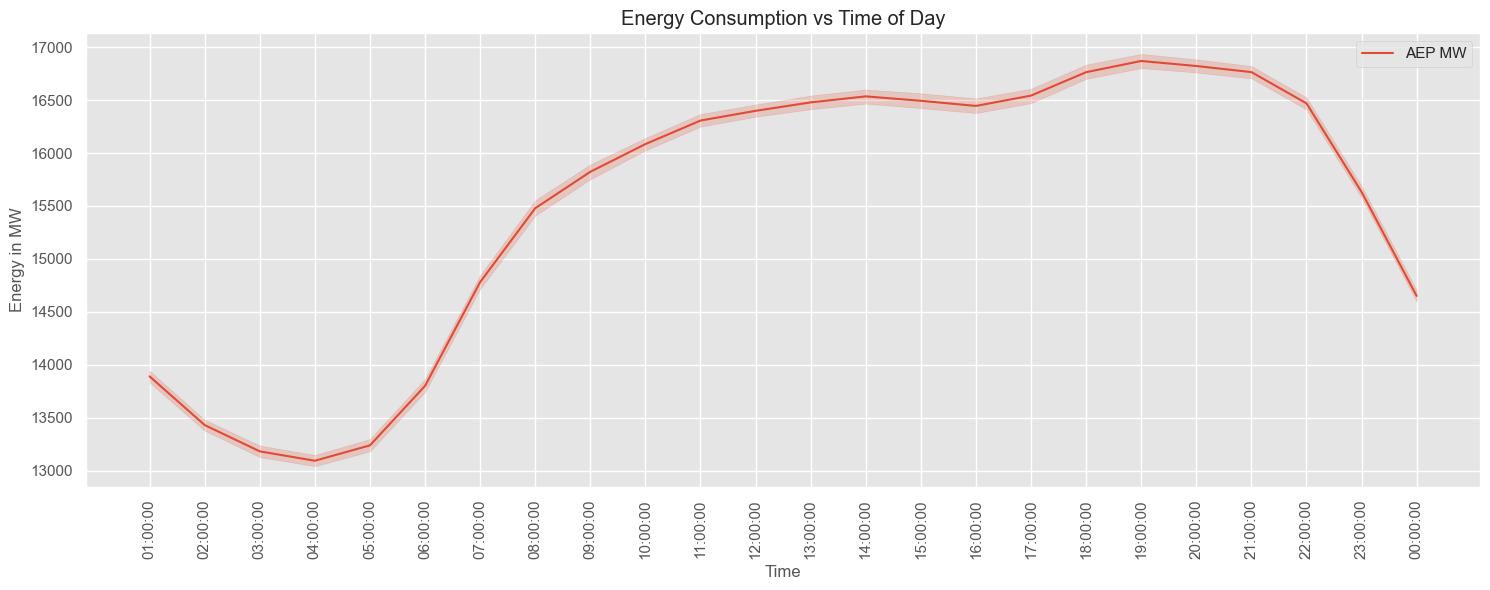

In [67]:
# Make sure 'Time' is a column of string or category for seaborn
dataset['Time'] = dataset.index.time

# Optional: Convert to string to prevent plotting issues
dataset['Time'] = dataset['Time'].astype(str)

# Plot
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(111)
sns.lineplot(x='Time', y='AEP_MW', data=dataset, ax=ax1, label='AEP MW')

# Improve plot
plt.title('Energy Consumption vs Time of Day')
plt.xlabel('Time')
plt.ylabel('Energy in MW')
plt.grid(True)
ax1.legend()

# Rotate x-axis labels for clarity
for label in ax1.get_xticklabels():
    label.set_rotation(90)

plt.tight_layout()
plt.show()

RANDOM FOREST MODEL


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
df = dataset[['AEP_MW']].copy()

In [79]:
# Lag features (previous values)
df['lag_1'] = df['AEP_MW'].shift(1)
df['lag_24'] = df['AEP_MW'].shift(24)  # Same hour, previous day
df['lag_168'] = df['AEP_MW'].shift(168)  # Same hour, previous week

# Rolling average (moving average)
df['rolling_mean_24'] = df['AEP_MW'].shift(1).rolling(window=24).mean()

# Drop rows with NaN (from shifting)
df.dropna(inplace=True)
print(df.columns)

Index(['AEP_MW', 'lag_1', 'lag_24', 'lag_168', 'rolling_mean_24'], dtype='object')


In [81]:
df.index= pd.to_datetime(df.index)

In [85]:
train = df[:2018]
test = df[2019:]

In [87]:
X_train = train[['lag_1', 'lag_24', 'lag_168', 'rolling_mean_24']]
y_train = train['AEP_MW']

X_test = test[['lag_1', 'lag_24', 'lag_168', 'rolling_mean_24']]
y_test = test['AEP_MW']

In [89]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [91]:
y_pred= model.predict(X_test)

In [93]:
rmse = mean_squared_error(y_test,y_pred, squared= False)
mae = mean_absolute_error(y_test,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 656.47
MAE: 474.50


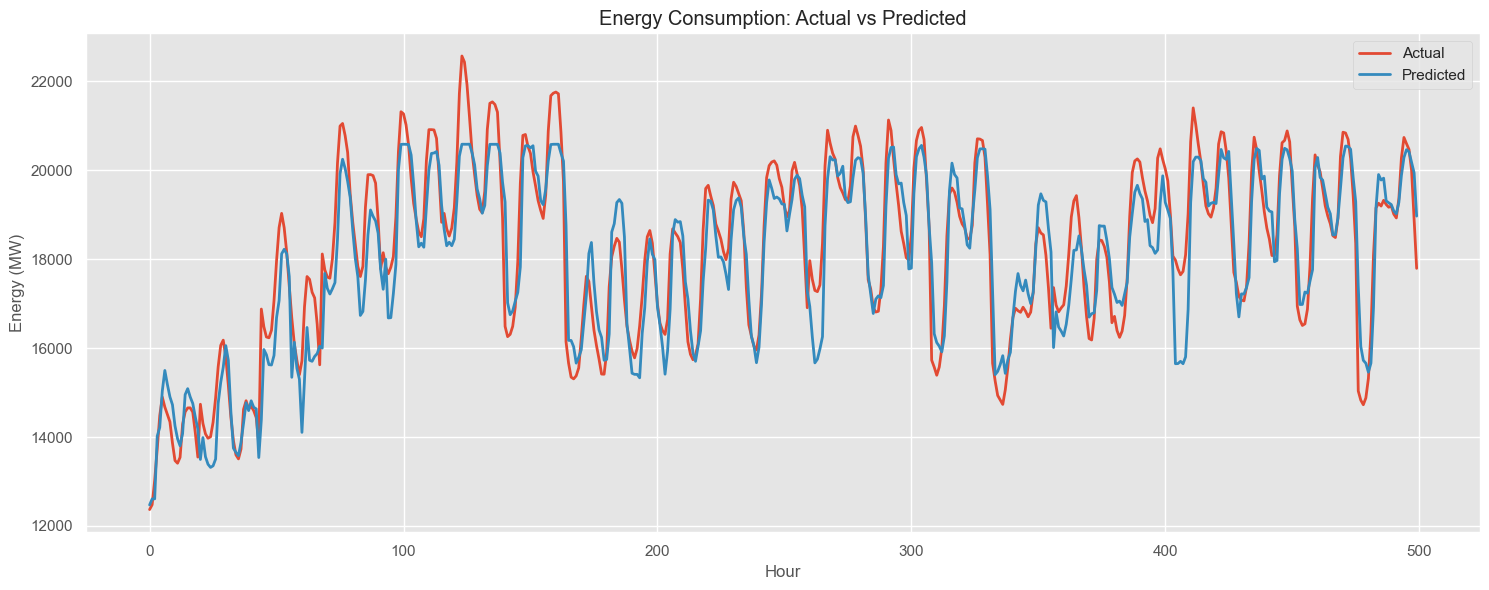

In [95]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:500], label='Actual', linewidth=2)
plt.plot(y_pred[:500], label='Predicted', linewidth=2)
plt.title("Energy Consumption: Actual vs Predicted")
plt.xlabel("Hour")
plt.ylabel("Energy (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

XGBOOST

In [99]:
from xgboost import XGBRegressor

In [101]:
df = dataset[['AEP_MW']].copy()

In [103]:
df['lag_1'] = df['AEP_MW'].shift(1)
df['lag_24'] = df['AEP_MW'].shift(24)
df['lag_168'] = df['AEP_MW'].shift(168)
df['rolling_mean_24'] = df['AEP_MW'].shift(1).rolling(window=24).mean()

In [105]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

In [107]:
df.dropna(inplace=True)

In [111]:
train = df[:2018]
test = df[2019:]

features = ['lag_1', 'lag_24', 'lag_168', 'rolling_mean_24', 'hour', 'dayofweek', 'month']
X_train = train[features]
y_train = train['AEP_MW']
X_test = test[features]
y_test = test['AEP_MW']

In [113]:
model= XGBRegressor(n_estimators=200, learning_rate= 0.1,max_depth=6, random_state=42)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [115]:
y_pred = model.predict(X_test)

In [117]:
rmse = mean_squared_error(y_test,y_pred, squared= False)
mae = mean_absolute_error(y_test,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 497.38
MAE: 340.05


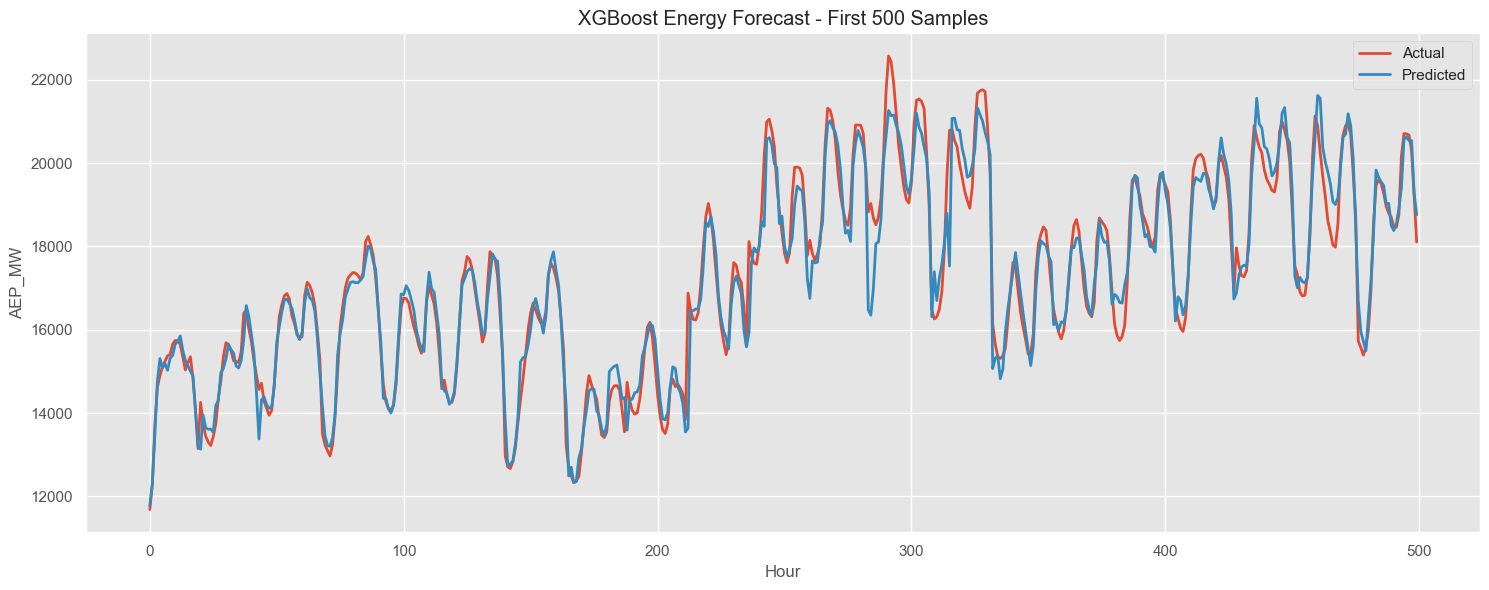

In [119]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:500], label='Actual', linewidth=2)
plt.plot(y_pred[:500], label='Predicted', linewidth=2)
plt.title("XGBoost Energy Forecast - First 500 Samples")
plt.xlabel("Hour")
plt.ylabel("AEP_MW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()